# Data Science Aplicada à Área de Saúde

Projeto de análise de dados da formação FIAMED da [DSA](https://www.datascienceacademy.com.br/)

## Análise Exploratória Para Dados de Previsão de Custos Médicos

Modelagem preditiva de custos relacionados à despesas médicas para uma amostra da população de pacientes de um hospital, considerando o hábito de fumar, idade, sexo, IMC e região.

__Dicionário de Dados:__
    
- __idade:__ idade do paciente

- __sexo:__ sexo do paciente (feminino, masculino)

- __IMC:__ índice de massa corporal, usando a razão entre altura e peso (idealmente 18,5 a 24,9)

- __filhos:__ número de filhos do paciente

- __fumante:__ se fuma ou não

- __região:__ a área residencial do paciente.

- __custo_medico_anual:__ custo médico anual do paciente em uma clínica medica (__variável alvo__)

In [1]:
# Importar pacotes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando o dataset
dataset = pd.read_csv('dados/custos_seguro.csv')

In [3]:
# Visualizando alguns registros
dataset.head() 

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90,0,yes,sudeste,16884.92400
1,18,masculino,33.77,1,no,sul,1725.55230
2,28,masculino,33.00,3,no,sul,4449.46200
3,33,masculino,NaN,0,no,nordeste,21984.47061
4,32,masculino,28.88,0,no,nordeste,3866.85520


In [4]:
# Visualizando os tipos de dados
dataset.dtypes

idade                   int64
sexo                   object
imc                   float64
filhos                  int64
fumante                object
regiao                 object
custo_medico_anual    float64
dtype: object

In [5]:
# Visualizando o total de linhas por coluna
print(f'Número de features:\t{dataset.shape[1]}')
print(f'Número de observações:\t{dataset.shape[0]}')

Número de features:	7
Número de observações:	1338


In [6]:
# Verifique se há valores ausentes
(dataset.isnull().mean() * 100).round(1)

idade                 0.0
sexo                  0.0
imc                   1.0
filhos                0.0
fumante               0.0
regiao                0.0
custo_medico_anual    0.0
dtype: float64

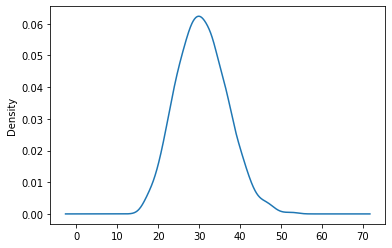

In [7]:
# Visualizar a distribuição da variável IMC 
dataset.imc.plot(kind='density');

In [8]:
# Imputar mediana na variável IMC
dataset.imc = dataset.imc.fillna(dataset.imc.median())

Idade máxima:	64
Idade mínima:	18


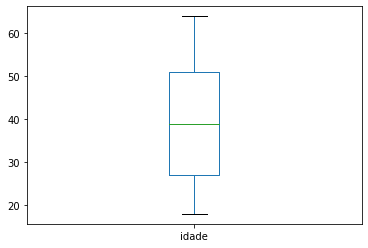

In [9]:
# Verifique se há valores outliers na variável idade
print(f'Idade máxima:\t{dataset.idade.max()}')
print(f'Idade mínima:\t{dataset.idade.min()}')
dataset.idade.plot(kind='box');

IMC máximo:	53.13
IMC mínimo:	15.96


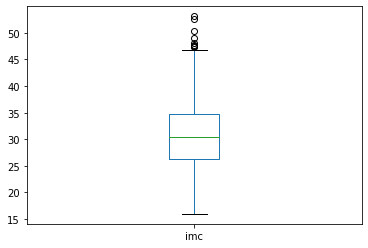

In [10]:
# Verifique se há valores outliers na variável imc
print(f'IMC máximo:\t{dataset.imc.max()}')
print(f'IMC mínimo:\t{dataset.imc.min()}')
dataset.imc.plot(kind='box');

In [11]:
# Verifique se há valores outliers na variável filhos
print(f'Número máximo de filhos:\t{dataset.filhos.max()}')
print(f'Número mínimo de filhos:\t{dataset.filhos.min()}')

Número máximo de filhos:	5
Número mínimo de filhos:	0


Convertendo as variáveis para o tipo numérico inteiro a fim de calcular as correlações

In [12]:
# Visualizar a variável sexo
dataset['sexo'].value_counts()

masculino    676
feminino     662
Name: sexo, dtype: int64

In [13]:
# Dados sexo dummie
dataset['sexo'] = dataset.sexo.replace('feminino', 1)
dataset['sexo'] = dataset.sexo.replace('masculino', 0)

In [14]:
# Visualizar a variável fumante
dataset['fumante'].value_counts()

no     1064
yes     274
Name: fumante, dtype: int64

In [15]:
# Dados fumante dummie
dataset['fumante'] = dataset.fumante.replace('yes', 1)
dataset['fumante'] = dataset.fumante.replace('no', 0)

In [16]:
# Visualizar a variável regiao
dataset['regiao'].value_counts()

sul         364
sudeste     325
nordeste    325
norte       324
Name: regiao, dtype: int64

In [17]:
# Dados região dummie
dataset = dataset.join(pd.get_dummies(dataset.regiao, prefix='regiao'))
dataset = dataset.drop(columns='regiao')

In [18]:
dataset.head()

,idade,sexo,imc,filhos,fumante,custo_medico_anual,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,19,1,27.90,0,1,16884.92400,0,0,1,0
1,18,0,33.77,1,0,1725.55230,0,0,0,1
2,28,0,33.00,3,0,4449.46200,0,0,0,1
3,33,0,30.40,0,0,21984.47061,1,0,0,0
4,32,0,28.88,0,0,3866.85520,1,0,0,0


In [19]:
# Visualizando os tipos de dados
dataset.dtypes

idade                   int64
sexo                    int64
imc                   float64
filhos                  int64
fumante                 int64
custo_medico_anual    float64
regiao_nordeste         uint8
regiao_norte            uint8
regiao_sudeste          uint8
regiao_sul              uint8
dtype: object

In [20]:
dataset.describe()

,idade,sexo,imc,filhos,fumante,custo_medico_anual,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.690172,1.094918,0.204783,13270.422265,0.242900,0.242152,0.242900,0.272048
std,14.049960,0.500160,6.076117,1.205493,0.403694,12110.011237,0.428995,0.428546,0.428995,0.445181
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.336250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.656250,2.000000,0.000000,16639.912515,0.000000,0.000000,0.000000,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## Quais variáveis tem maior correlação com o custo_medico_anual?

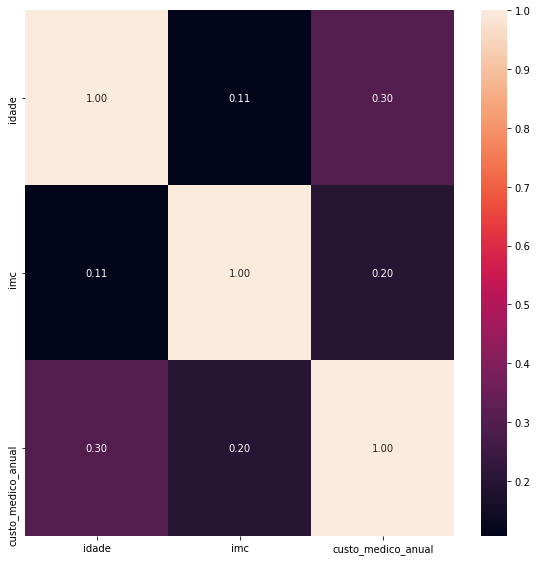

In [21]:
from seaborn import heatmap

fig, ax = plt.subplots(figsize=(8,8))
ax = heatmap(dataset[['idade', 'imc', 'custo_medico_anual']].corr(), fmt='.2f', annot=True, ax=ax)
plt.tight_layout()

Tanto a idade, quanto o IMC tem uma correlação positiva baixa.

## Entre fumantes e não fumantes, qual grupo tem maior custo_medico_anual?

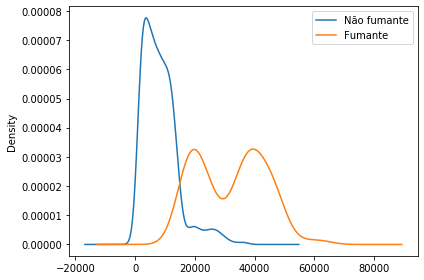

In [22]:
grupo_fumante = dataset.groupby(dataset.fumante)
grupo_fumante['custo_medico_anual'].plot(kind='density')
plt.legend(['Não fumante', 'Fumante'])
plt.tight_layout()

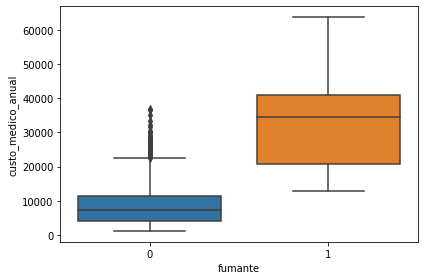

In [23]:
sns.boxplot(x='fumante', y='custo_medico_anual', data=dataset)
plt.tight_layout()

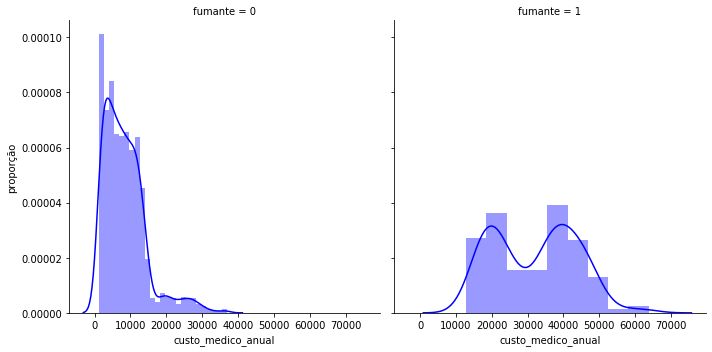

In [24]:
grafico = sns.FacetGrid(dataset, col = "fumante", height = 5, sharey = True, sharex = True)
grafico.map(sns.distplot, "custo_medico_anual", color = 'b')
grafico.set_axis_labels("custo_medico_anual", "proporção")
plt.tight_layout()

## Qual faixa etária apresenta maior custo_medico_anual?

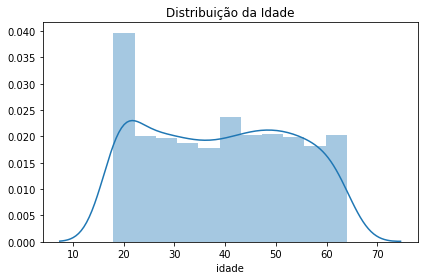

In [25]:
plt.title("Distribuição da Idade")
ax = sns.distplot(dataset["idade"])
plt.tight_layout()

In [26]:
range_total = dataset.idade.max() - dataset.idade.min()

In [27]:
dataset['idade_cat'] = np.where(dataset.idade < dataset.idade.min() + range_total/3, 'jovem', 
         np.where(dataset.idade < dataset.idade.min() + 2*range_total/3, 'Adulto', 'Senior'))

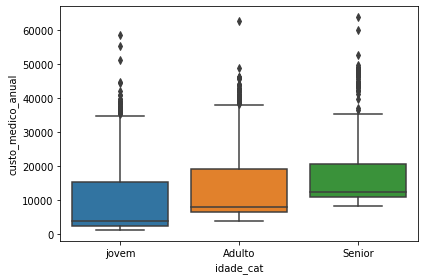

In [28]:
sns.boxplot(x='idade_cat', y='custo_medico_anual', data=dataset)
plt.tight_layout()

In [29]:
grupo_idade = dataset.groupby(dataset.idade_cat)
grupo_idade['custo_medico_anual'].mean().sort_values(ascending=False).round(2)

idade_cat
Senior    17549.57
Adulto    13679.49
jovem      9576.86
Name: custo_medico_anual, dtype: float64

O assegurados na faixa etária sênior tem um gasto hospitalar maior (média de $17549.57).

## A proporção de fumantes por sexo é semelhante ou precisamos balancear esses dados?

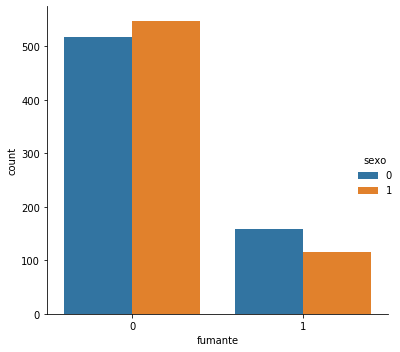

In [37]:
sns.catplot(x='fumante', kind='count', hue='sexo', data=dataset)
plt.tight_layout()

Entre o sexo, a variável fumante é equilibrada.

## À medida que a idade do paciente aumenta o que acontece com o custo_medico_anual? Há diferença entre fumantes e não fumantes?

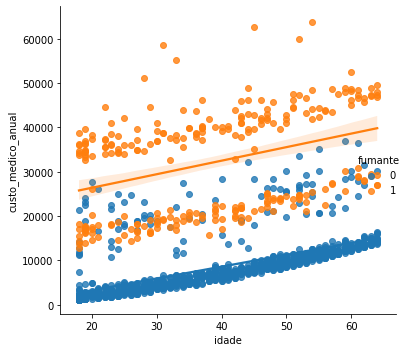

In [38]:
sns.lmplot(x="idade", y="custo_medico_anual", hue="fumante", data=dataset)
plt.tight_layout()

## Construção do Modelo Preditivo

### Preparação dos dados

Como a variável target é umvalor numérico, o modelo usado será Regressão Linear.

In [41]:
# Visualizar o dataset
dataset = dataset.drop(columns='idade_cat')
dataset.head()

,idade,sexo,imc,filhos,fumante,custo_medico_anual,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,19,1,27.90,0,1,16884.92400,0,0,1,0
1,18,0,33.77,1,0,1725.55230,0,0,0,1
2,28,0,33.00,3,0,4449.46200,0,0,0,1
3,33,0,30.40,0,0,21984.47061,1,0,0,0
4,32,0,28.88,0,0,3866.85520,1,0,0,0


In [43]:
# Divide os dados em X e y
X = dataset.drop(columns='custo_medico_anual')
y = dataset['custo_medico_anual']

In [48]:
# Divide os dados em treino e teste
## Importa a função
from sklearn.model_selection import train_test_split

## Aplica a função com 10% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [70]:
# Cria a primeira versão do modelo de regressão linear
## Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Cria o modelo e treina com os dados de teste
lr = LinearRegression().fit(X_train, y_train)

## Previsões  nos dados de treino
lr_train_pred = lr.predict(X_train)

## Previsões  nos dados de teste
lr_test_pred = lr.predict(X_test)

## Calcula as métricas
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

## Imprime o MSE (Mean Squared Error)
print('MSE (Mean Squared Error)\n')
print(f'MSE nos dados de treino:\t{lr_train_mse:.3f}')
print(f'MSE nos dados de teste:\t\t{lr_test_mse:.3f}')
print('\n', '---'*20, '\n')

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE (Root Mean Squared Error)\n')
print(f'RMSE nos dados de treino:\t{lr_train_mse**(1/2):.3f}')
print(f'RMSE nos dados de teste:\t{lr_test_mse**(1/2):.3f}')
print('\n', '---'*20, '\n')

## Coeficiente R2
print('Coeficiente R2\n')
print(f'R2 nos dados de treino:\t\t{r2_score(y_train, lr_train_pred):.3f}')
print(f'R2 nos dados de teste:\t\t{r2_score(y_test, lr_test_pred):.3f}')
print('\n', '---'*20, '\n')

MSE (Mean Squared Error)

MSE nos dados de treino:	36918440.505
MSE nos dados de teste:		32585366.280

 ------------------------------------------------------------ 

RMSE (Root Mean Squared Error)

RMSE nos dados de treino:	6076.055
RMSE nos dados de teste:	5708.359

 ------------------------------------------------------------ 

Coeficiente R2

R2 nos dados de treino:		0.750
R2 nos dados de teste:		0.764

 ------------------------------------------------------------ 



In [69]:
# Testando outro modelo (Método Ensemble)
## Imports
from sklearn.ensemble import RandomForestRegressor

## Cria o modelo e treina com os dados de teste
rfr = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)

## Previsões  nos dados de treino
rfr_train_pred = rfr.predict(X_train)

## Previsões  nos dados de teste
rfr_test_pred = rfr.predict(X_test)

## Calcula as métricas
rfr_train_mse = mean_squared_error(y_train, rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test, rfr_test_pred)

## Imprime o MSE (Mean Squared Error)
print('MSE (Mean Squared Error)\n')
print(f'MSE nos dados de treino:\t{rfr_train_mse:.3f}')
print(f'MSE nos dados de teste:\t\t{rfr_test_mse:.3f}')
print('\n', '---'*20, '\n')

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE (Root Mean Squared Error)\n')
print(f'RMSE nos dados de treino:\t{rfr_train_mse**(1/2):.3f}')
print(f'RMSE nos dados de teste:\t{rfr_test_mse**(1/2):.3f}')
print('\n', '---'*20, '\n')

## Coeficiente R2
print('Coeficiente R2\n')
print(f'R2 nos dados de treino:\t\t{r2_score(y_train, rfr_train_pred):.3f}')
print(f'R2 nos dados de teste:\t\t{r2_score(y_test, rfr_test_pred):.3f}')
print('\n', '---'*20, '\n')

MSE (Mean Squared Error)

MSE nos dados de treino:	3585888.965
MSE nos dados de teste:		26578122.550

 ------------------------------------------------------------ 

RMSE (Root Mean Squared Error)

RMSE nos dados de treino:	1893.644
RMSE nos dados de teste:	5155.397

 ------------------------------------------------------------ 

Coeficiente R2

R2 nos dados de treino:		0.976
R2 nos dados de teste:		0.807

 ------------------------------------------------------------ 



---